In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
gen_df = pd.read_csv("../data/clean/cleaned_generation_data.csv")

In [9]:
gen_df.head()

,year,month,net_utility_generation,est_distributed_generation,utility_generation,independent_generation,commercial_utility_generation,commercial_distributed_generation,industrial_utility_generation,industrial_distributed_generation,residential_generation,summer_capacity_utility,summer_capacity_distributed,summer_capacity_residential,summer_capacity_commercial,summer_capacity_industrial
0,2014,January,697,624,53,681,16,300,1.0,62,263,5688.0,5612.6,2285.2,2766.5,561.0
1,2014,February,752,664,61,753,20,322,1.0,65,277,5839.2,5728.2,2354.4,2804.9,568.9
2,2014,March,1135,907,91,1196,29,432,1.0,93,382,5967.9,5853.0,2428.2,2848.7,576.2
3,2014,April,1261,988,98,1355,33,467,2.0,101,421,6188.0,5978.9,2506.9,2883.8,588.2
4,2014,May,1457,1092,114,1596,38,512,2.0,111,468,6368.8,6111.6,2588.3,2930.2,593.0


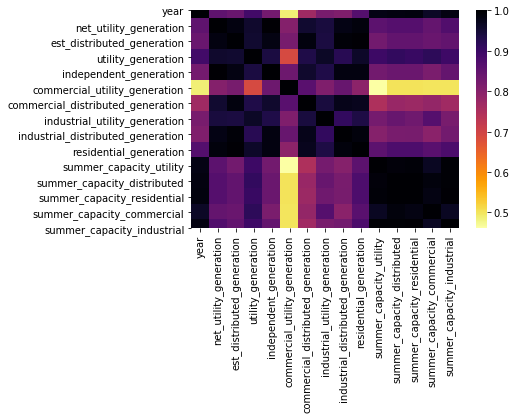

In [10]:
sns.heatmap(gen_df.corr(), cmap="inferno_r")

dark areas suggest closest relationship of linear correlation. as one would expect, the generation features and the capacity features most closely cluster together. it may be worth taking the time to investigate those clusters individually. the relatively mild correlation between the utility-scale commercial generation and the corresponding capacity is somewhat interesting, however. the very strong correlation between year and capacity shows that that not only is capacity likely to continue to grow over time, but that the growth is strongly tied to time in a linear fashion.

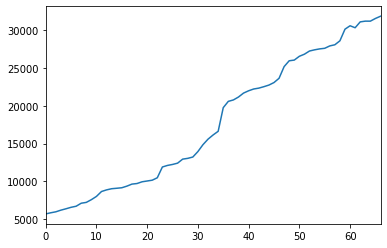

In [15]:
gen_df["summer_capacity_utility"].plot()

In [23]:
gen_df[["year","month"]]

,year,month
0,2014,January
1,2014,February
2,2014,March
3,2014,April
4,2014,May
...,...,...
62,2019,March
63,2019,April
64,2019,May
65,2019,June


In [28]:
enph = pd.read_csv("../data/clean/enph.csv", index_col="date",infer_datetime_format=True, parse_dates=True)
enph.head()

,open,high,low,close,volume
date,,,,,
2012-03-30,7.50,8.24,7.0600,7.34,5048600.0
2012-04-02,7.65,8.20,7.4000,7.81,495500.0
2012-04-03,7.75,7.80,7.5000,7.64,316600.0
2012-04-04,7.77,7.77,7.3101,7.45,165100.0
2012-04-05,7.48,7.55,7.3700,7.43,104300.0


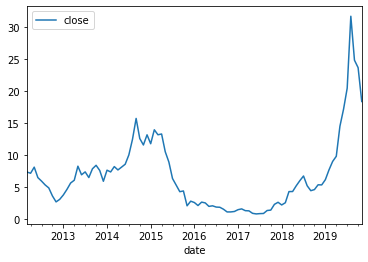

In [33]:
enph.resample("M").mean().plot(y=["close"])

In [34]:
# next: add year/month columns, then join with the gen_df
# investigate any relationshps beteen gen_df/closing prices (or volume?)
# export closing/volume resample to use in plant_changes analysis as well